## Hausarbeit - Abgabe 4
• Erstellen Sie ein neues Modell mit der Formel
    𝑤2 ⋅ 𝑡𝑢^^2 + 𝑤1 ⋅ 𝑡𝑢 + 𝑏
    
• Passen Sie den Trainingsloop entsprechend an und führen Sie das Training erneut durch

• Ist der „Loss“ mit dem neuen Modell größer oder kleiner geworden?

• Sieht das Ergebnis mit dem neuen Modell besser oder schlechter aus?

• Plotten Sie den Verlauf des Losses während eines Trainings über 5000 Epochen mit dem neuen und alten Modell in einem Graph

<span style="color:red">**Anmerkung: Die Beantwortung der Fragen finden Sie am Ende dieses Notebooks**</span>

### Laden der nötigen Bibliotheken

In [94]:
import torch
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import matplotlib.pyplot as plt 
import torch.optim as optim

### 1. Aufgabe: 
Erstellen Sie ein neues Modell mit der Formel
    𝑤2 ⋅ 𝑡𝑢^^2 + 𝑤1 ⋅ 𝑡𝑢 + 𝑏

In [95]:
values = np.loadtxt('vl5_data.csv')
t_u = torch.tensor(values[:,1])
t_c = torch.tensor(values[:,0])

### NEUES MODELL:

Epoch 1, Training loss 659.6198, Validation loss 748.5786
Epoch 2, Training loss 475.5853, Validation loss 527.7252
Epoch 3, Training loss 323.1510, Validation loss 346.8531
Epoch 500, Training loss 3.0027, Validation loss 2.0301
Epoch 1000, Training loss 2.6370, Validation loss 1.8811
Epoch 1500, Training loss 2.3952, Validation loss 1.7626
Epoch 2000, Training loss 2.2910, Validation loss 1.6914
Epoch 2500, Training loss 2.2622, Validation loss 1.6567
Epoch 3000, Training loss 2.2574, Validation loss 1.6430
Epoch 3500, Training loss 2.2570, Validation loss 1.6388
Epoch 4000, Training loss 2.2570, Validation loss 1.6379
Epoch 4500, Training loss 2.2570, Validation loss 1.6378
Epoch 5000, Training loss 2.2570, Validation loss 1.6378


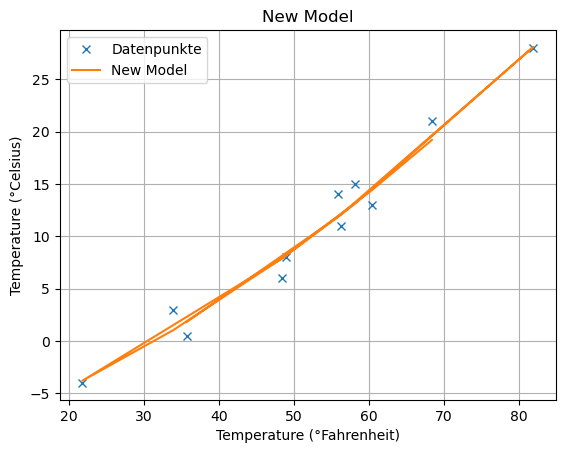

In [96]:
# Modell mit neuer Funktion
def model(t_u, w1, w2, b):
    return w2 * pow(t_u, 2) + w1 * t_u + b

# Definition der Loss-Function
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

# Unterteilung des Datensatzes in Training- und Validierungsdaten
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_indices, val_indices

t_un = t_u * 0.1
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

# Leere Listen für die Werte der Epochen und der Werte des Losses
epoche_model2 = []
train_loss_value_model2 = []
val_loss_value_model2 = []

# Definition des Trainingloops
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        val_t_p = model(val_t_u, *params) 
        val_loss = loss_fn(val_t_p, val_t_c)
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        epoche_model2.append(epoch)
        train_loss_value_model2.append(train_loss.item())
        val_loss_value_model2.append(val_loss.item())
        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"f" Validation loss {val_loss.item():.4f}")
    return params

# Durchführung des Training-Loops
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate)
training_loop(n_epochs = 5000,
              optimizer = optimizer,
              params = params,
              train_t_u = train_t_un,
              val_t_u = val_t_un, 
              train_t_c = train_t_c,
              val_t_c = val_t_c)

t_p_model2 = model(t_un, *params)
plt.plot(t_u, t_c, 'x', label = "Datenpunkte")
plt.plot(t_u, t_p_model2.detach().numpy(), label = "New Model")
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.title("New Model")
plt.legend()
plt.grid()
plt.show()

### ALTES MODELL:

Epoch 1, Training loss 74.8700, Validation loss 105.0889
Epoch 2, Training loss 67.3489, Validation loss 92.6364
Epoch 3, Training loss 60.6364, Validation loss 81.1910
Epoch 500, Training loss 3.1633, Validation loss 2.3308
Epoch 1000, Training loss 3.1536, Validation loss 2.1562
Epoch 1500, Training loss 3.1536, Validation loss 2.1562
Epoch 2000, Training loss 3.1536, Validation loss 2.1562
Epoch 2500, Training loss 3.1536, Validation loss 2.1562
Epoch 3000, Training loss 3.1536, Validation loss 2.1562
Epoch 3500, Training loss 3.1536, Validation loss 2.1562
Epoch 4000, Training loss 3.1536, Validation loss 2.1562
Epoch 4500, Training loss 3.1536, Validation loss 2.1562
Epoch 5000, Training loss 3.1536, Validation loss 2.1562


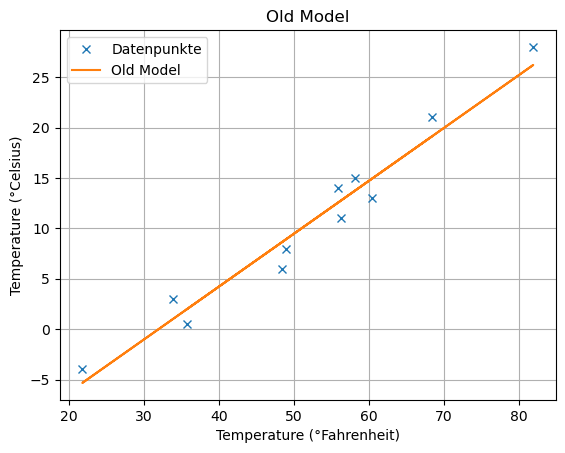

In [97]:
# Model mit alter Funktion:
def model(t_u, w, b):
    return w * t_u + b

# Definieren der Loss Funktion
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

# Leere Listen für die Werte der Epochen und der Werte des Losses
epoche_model1 = []
train_loss_value_model1 = []
val_loss_value_model1 = []

# Definition des Trainingloops
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        val_t_p = model(val_t_u, *params) 
        val_loss = loss_fn(val_t_p, val_t_c)
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        epoche_model1.append(epoch)
        train_loss_value_model1.append(train_loss.item())
        val_loss_value_model1.append(val_loss.item())
        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"f" Validation loss {val_loss.item():.4f}")
    return params


params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate)
training_loop(n_epochs = 5000,
              optimizer = optimizer,
              params = params,
              train_t_u = train_t_un,
              val_t_u = val_t_un, 
              train_t_c = train_t_c,
              val_t_c = val_t_c)

t_p_model1= model(t_un, *params)
plt.plot(t_u, t_c, 'x', label = "Datenpunkte")
plt.plot(t_u, t_p_model1.detach().numpy(), label = "Old Model")
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.title("Old Model")
plt.legend()
plt.grid()
plt.show()

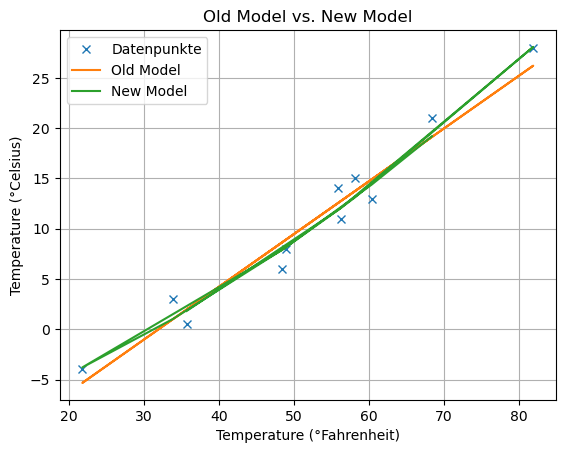

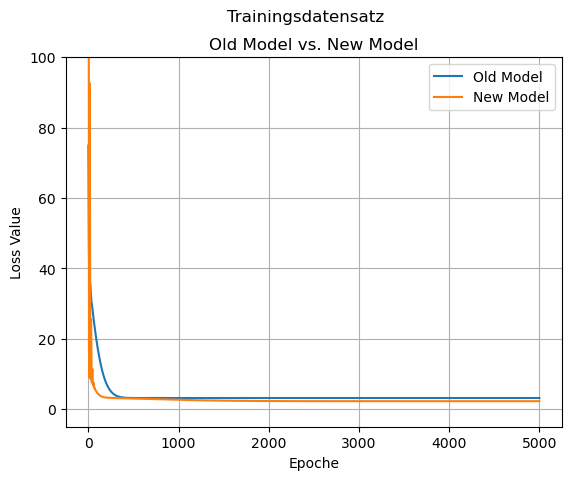

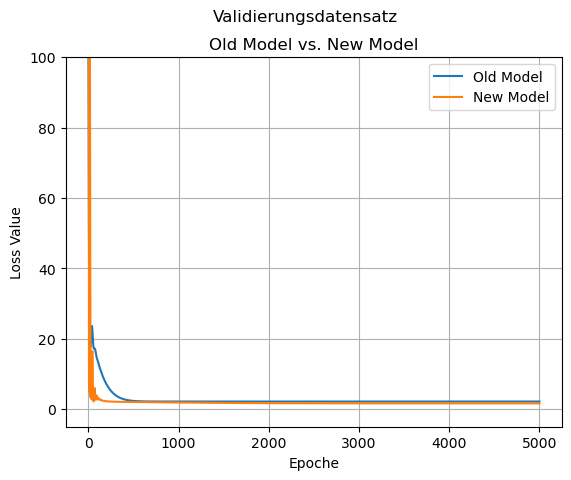

In [98]:
# Plot New Model vs. Old Model
plt.plot(t_u, t_c, 'x', label = "Datenpunkte")
plt.plot(t_u, t_p_model1.detach().numpy(), label = "Old Model")
plt.plot(t_u, t_p_model2.detach().numpy(), label = "New Model")
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.title("Old Model vs. New Model")
plt.legend()
plt.grid()
plt.show()

# Plot Loss New Model and Old Model vs. Epoche
plt.plot(epoche_model1, train_loss_value_model1, label = "Old Model")
plt.plot(epoche_model2, train_loss_value_model2, label = "New Model")
plt.xlabel("Epoche")
plt.ylabel("Loss Value")
plt.title("Old Model vs. New Model")
plt.suptitle("Trainingsdatensatz")
plt.legend()
plt.grid()
plt.ylim(-5, 100)
plt.show()

# Plot Loss New Model and Old Model vs. Epoche
plt.plot(epoche_model1, val_loss_value_model1, label = "Old Model")
plt.plot(epoche_model2, val_loss_value_model2, label = "New Model")
plt.xlabel("Epoche")
plt.ylabel("Loss Value")
plt.title("Old Model vs. New Model")
plt.suptitle("Validierungsdatensatz")
plt.legend()
plt.grid()
plt.ylim(-5, 100)
plt.show()

#### **Frage: Ist der „Loss“ mit dem neuen Modell größer oder kleiner geworden?**
**Trainingsdatensatz:** Der "Loss" für den Trainingsdatensatzes ist mit dem neuen Modell deutlich kleiner geworden als mit dem alten Modell. Beim neuen Modell liegt der "Loss" ungefähr bei 2,25 und beim alten Modell bei 3,15.

**Validierungsdatensatz:** Der "Loss" des Validierungsdatensatzes ist auch mit dem neuen Modell deutlich kleiner und somit besser geworden als mit dem alten Modell. Beim alten Modell lag der Wert bei ungefähr 2,15 und beim neuen Modell liegt dieser Wert nun bei 1,64.

#### **Frage: Sieht das Ergebnis mit dem neuen Modell besser oder schlechter aus?**
Das Ergebnis mit dem neuen Modell sieht optisch minimal besser aus als mit dem alten Modell. Das alte Modell legt lediglich eine gerade zwischen die Datenpunkte, sodass diese einen minimalen Abstand zur Linie besitzen. Mit dem neuen Modell wird eine nicht lineare Funktion zwischen die Datenpunkte gelegt. Dies hat zur Folge, dass das neue Modell deutlich näher an den einzelnen Datenpunkten liegt und teilweise durch diese hindurch geht. Daher ist auch der "Loss" des neuen Modells besser geworden. 